**Esercitazione**
Provare a completare il notebook, seguendo le indicazioni fornite.
Il notebook è fornito già eseguito, in modo da poter sfruttare l'output generato da ogni cella per
verificare la correttezza della risoluzione.
Alcune parti di codice sono state sostituite da tre punti consecutivi.


### Dataset sulla qualità dei vini

*Questo set di dati è correlato alle varianti rosse del vino portoghese
"Vinho Verde". Il set di dati descrive la quantità di varie sostanze
chimiche presenti nel vino e permette di identificare il loro effetto
sulla sua qualità.
Il dataset è disponibile su Kaggle alla url
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset*

In [1]:
# importazione librerie necessarie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
# caricamento dataset in memoria


df = pd.read_csv('data/WineQT.csv')

In [3]:
# visualizzazione delle prime 10 righe del dataset
# utilizzando uno stile per il background delle celle
# in grado di evidenziare i valori minimi e massimi
# tramite gradienti di colore che vanno dal bianco
# all'arancione

color_map = sns.light_palette('orange', as_cmap=True)

df.head(10).style.background_gradient(cmap=color_map)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5,6
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7,8
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5,10


In [4]:
# eliminazione della colonna [id] dal dataframe [df]

df.drop('Id',axis='columns',inplace=True)

In [5]:
# stampa del numero di righe e di colonne disponibili

print('sono disponibili', df.shape[0], 'esempi, ognuno caratterizzato da', df.shape[1], 'feature.')

sono disponibili 1143 esempi, ognuno caratterizzato da 12 feature.


In [6]:
# visualizzazione delle statistiche descrittive del dataset relativamente
# alle feature disponibili (conteggio, media, percentili, ...)
# visualizzando una feature per ogni riga ed avendo le statistiche
# sulle colonne

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
# visualizzazione delle informazioni sul dataset
# per la verifica dei tipi di dato disponibili
# e per la ricerca di valori non validi (null/NaN)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [8]:
# verifica della non presenza di valori null / NaN

df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [9]:
# analisi del numero di valori univoci per ogni
# caratteristica

df.nunique(0)

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

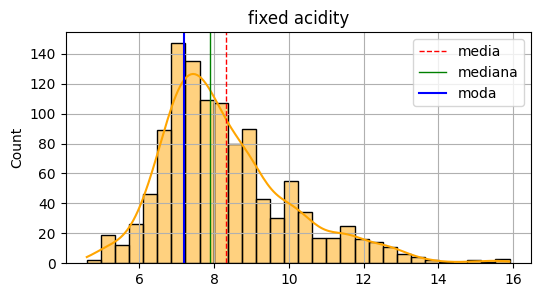

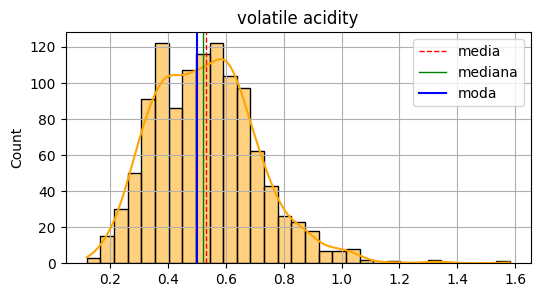

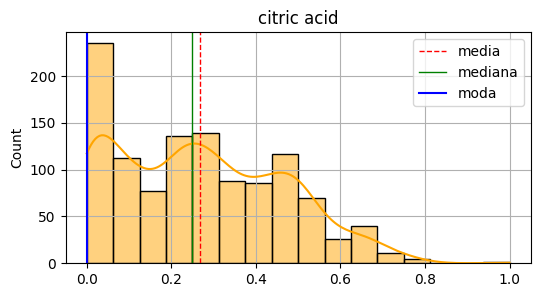

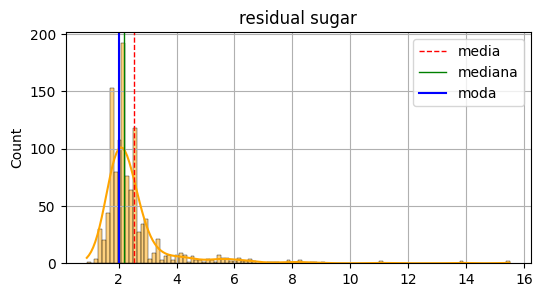

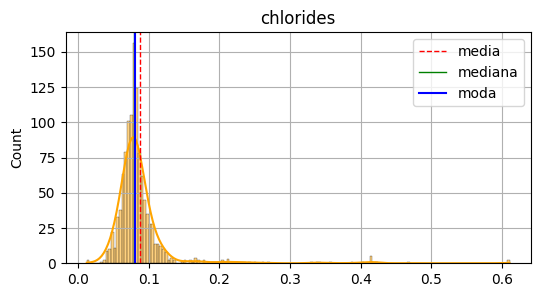

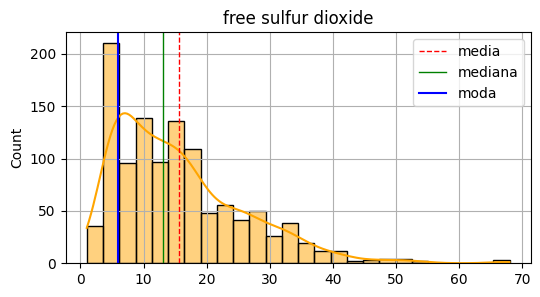

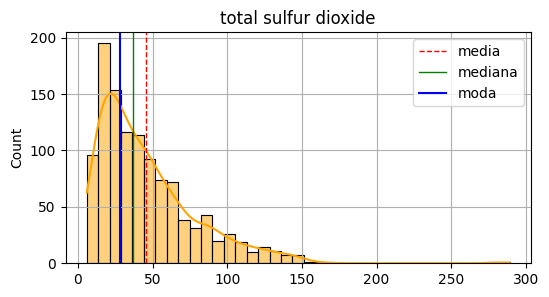

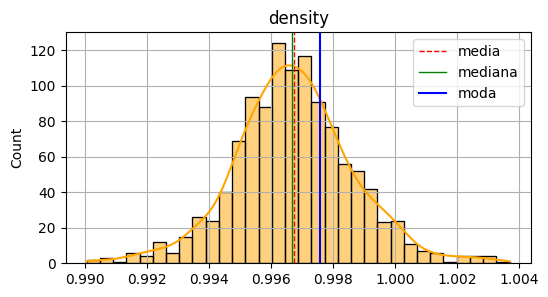

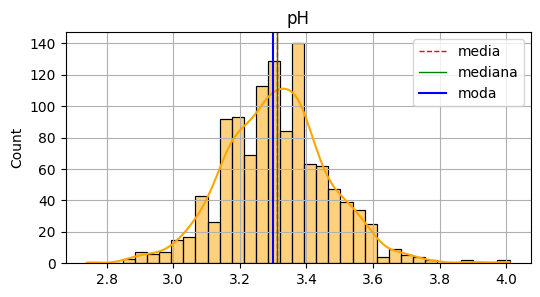

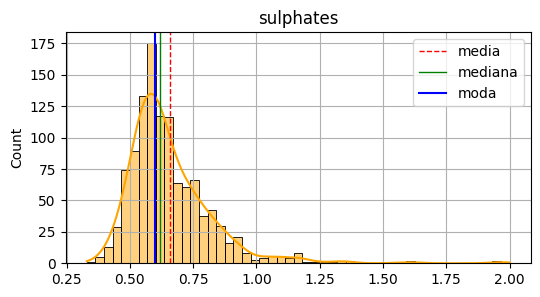

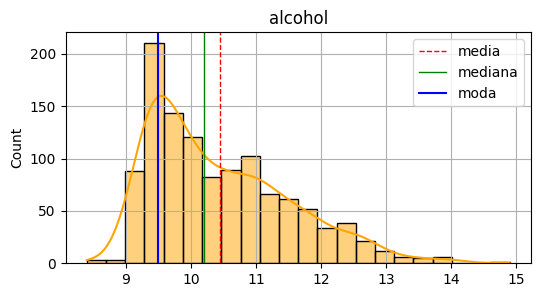

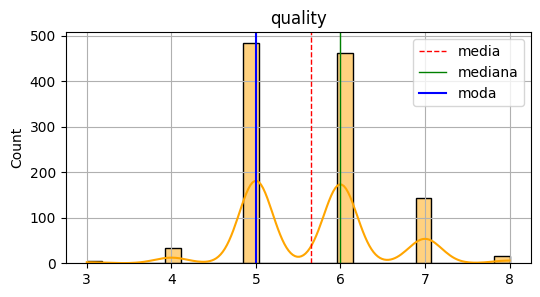

In [10]:
# analisi della distribuzione dei dati di ogni caratteristica
# tramite istogrammi

for col in df.columns:
    f, (ax1) = plt.subplots(1, 1, figsize=(6, 3))
    valori_distribuzione = df[col].values #df.loc[:,col].values
    sns.histplot(valori_distribuzione, ax=ax1, color='orange', kde=True)

    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode()[0]

    ax1.axvline(media, c='red', lw='1', ls='--', label='media')
    ax1.axvline(mediana, c='green', lw='1', label='mediana')
    ax1.axvline(moda, c='blue', lw='1.5', label='moda')
    
    
    ax1.legend()
    plt.grid()
    plt.title(col)

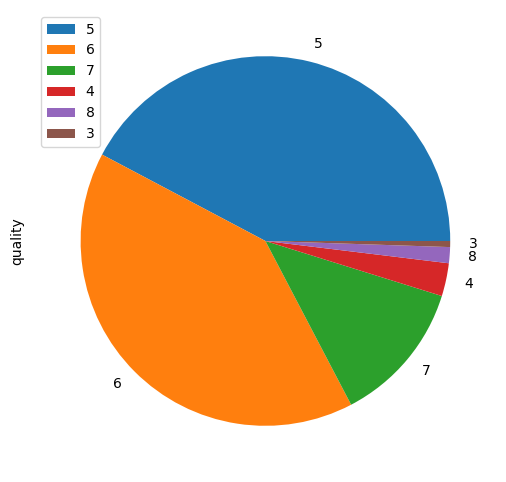

In [11]:
# analisi della distribuzione degli esempi disponibili
# relativamente alla qualità di ognuno tramite un
# diagramma a torta

plt.figure(figsize=(6, 6))
df.loc[:,'quality'].value_counts().plot(kind='pie')
plt.legend()
plt.show()

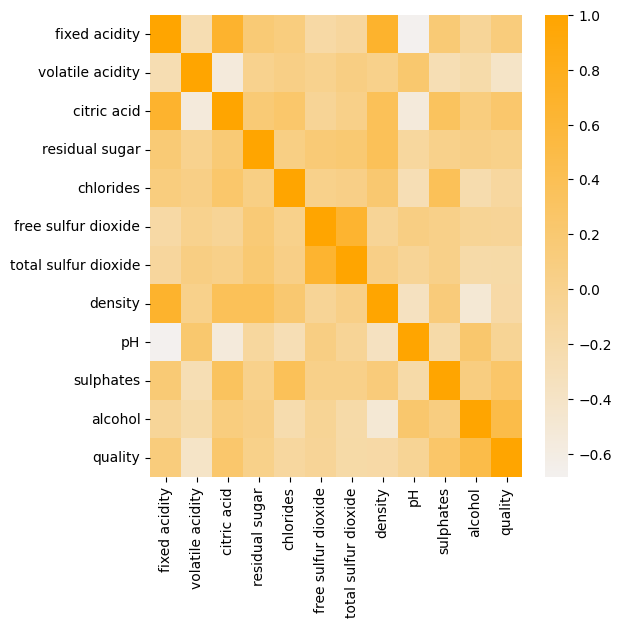

In [12]:
# analisi delle eventuali correlazioni
# tramite una mappa di correlazione

plt.figure(figsize=(6, 6))
corr = df.corr()
sns.heatmap(corr, xticklabels=df.columns, yticklabels=df.columns, cmap=color_map)
plt.show()

## creazione del dataset

In [13]:
# creazione del dataset [x] con tutte le colonne
# del dataframe [df] eccetto la colonna [quality]
x = df.iloc[:,:-1]

# creazione del dataset [y] usando la colonna
# [quality] del dataframe [df]
y = df.iloc[:,-1]

print('x', type(x), x.shape)
print('y', type(y), y.shape)

x <class 'pandas.core.frame.DataFrame'> (1143, 11)
y <class 'pandas.core.series.Series'> (1143,)


In [14]:
# mischiare il dataset prima di addestrare il modello

x, y = shuffle(x, y)

In [15]:
# utilizzo dei primi 1000 esempi per addestrare il
# modello e i restanti 143 esempi per validarlo

split = 1000

x_train = x.iloc[:split,:]
y_train = y.iloc[:split]

x_test = x.iloc[split:,:]
y_test = y.iloc[split:]

In [16]:
# normalizzazione il dataset tra 0 e 1
# calcolando i valori su cui normalizzare
# sul solo dataset di addestramento

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

## definizione del modello predittivo

In [17]:
# implementazione di una rete neurale artificiale
# con tre layer nascosti, ognuno con 8 neuroni
# e utilizzo della funzione di attivazione ReLu

input = tf.keras.Input(shape=(x_train.shape[1]))

layer_1 = tf.keras.layers.Dense(8, activation='ReLU')(input)
layer_2 = tf.keras.layers.Dense(8, activation='ReLU')(layer_1)
layer_3 = tf.keras.layers.Dense(8, activation='ReLU')(layer_2)

output = tf.keras.layers.Dense(1)(layer_3)

model = tf.keras.Model(inputs=input, outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mean_squared_error,
    metrics=tf.keras.metrics.mean_absolute_error
)

# visualizzazione del sommario del modello
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [18]:
# addestramento del modello su 100 epoche
# sfruttando il dataset classico e quello normalizzato

log = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=2,
    batch_size=64
)

log_norm = model.fit(
    x=x_train_norm,
    y=y_train,
    epochs=100,
    validation_data=(x_test_norm,y_test),
    verbose=2,
    batch_size=64
)

Epoch 1/100
16/16 - 0s - loss: 28.2267 - mean_absolute_error: 4.8198 - val_loss: 7.2953 - val_mean_absolute_error: 2.5905 - 420ms/epoch - 26ms/step
Epoch 2/100
16/16 - 0s - loss: 1.9678 - mean_absolute_error: 1.1133 - val_loss: 0.5955 - val_mean_absolute_error: 0.6509 - 34ms/epoch - 2ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6615 - mean_absolute_error: 0.6864 - val_loss: 0.5900 - val_mean_absolute_error: 0.6437 - 34ms/epoch - 2ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6618 - mean_absolute_error: 0.6843 - val_loss: 0.5902 - val_mean_absolute_error: 0.6444 - 34ms/epoch - 2ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6643 - mean_absolute_error: 0.6845 - val_loss: 0.5898 - val_mean_absolute_error: 0.6438 - 34ms/epoch - 2ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6589 - mean_absolute_error: 0.6868 - val_loss: 0.5911 - val_mean_absolute_error: 0.6340 - 34ms/epoch - 2ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6619 - mean_absolute_error: 0.6838 - val_loss: 0.5926 - val_mean_absolute_error: 0.6481 - 34ms

Epoch 58/100
16/16 - 0s - loss: 0.6658 - mean_absolute_error: 0.6869 - val_loss: 0.5927 - val_mean_absolute_error: 0.6481 - 32ms/epoch - 2ms/step
Epoch 59/100
16/16 - 0s - loss: 0.6612 - mean_absolute_error: 0.6867 - val_loss: 0.5892 - val_mean_absolute_error: 0.6382 - 33ms/epoch - 2ms/step
Epoch 60/100
16/16 - 0s - loss: 0.6585 - mean_absolute_error: 0.6849 - val_loss: 0.5907 - val_mean_absolute_error: 0.6346 - 32ms/epoch - 2ms/step
Epoch 61/100
16/16 - 0s - loss: 0.6610 - mean_absolute_error: 0.6851 - val_loss: 0.5926 - val_mean_absolute_error: 0.6481 - 32ms/epoch - 2ms/step
Epoch 62/100
16/16 - 0s - loss: 0.6584 - mean_absolute_error: 0.6812 - val_loss: 0.6015 - val_mean_absolute_error: 0.6549 - 33ms/epoch - 2ms/step
Epoch 63/100
16/16 - 0s - loss: 0.6609 - mean_absolute_error: 0.6875 - val_loss: 0.5897 - val_mean_absolute_error: 0.6435 - 32ms/epoch - 2ms/step
Epoch 64/100
16/16 - 0s - loss: 0.6597 - mean_absolute_error: 0.6854 - val_loss: 0.5903 - val_mean_absolute_error: 0.6449 - 

Epoch 15/100
16/16 - 0s - loss: 0.6439 - mean_absolute_error: 0.6772 - val_loss: 0.5650 - val_mean_absolute_error: 0.6178 - 30ms/epoch - 2ms/step
Epoch 16/100
16/16 - 0s - loss: 0.6403 - mean_absolute_error: 0.6733 - val_loss: 0.5613 - val_mean_absolute_error: 0.6270 - 31ms/epoch - 2ms/step
Epoch 17/100
16/16 - 0s - loss: 0.6426 - mean_absolute_error: 0.6741 - val_loss: 0.5570 - val_mean_absolute_error: 0.6221 - 30ms/epoch - 2ms/step
Epoch 18/100
16/16 - 0s - loss: 0.6373 - mean_absolute_error: 0.6721 - val_loss: 0.5569 - val_mean_absolute_error: 0.6250 - 31ms/epoch - 2ms/step
Epoch 19/100
16/16 - 0s - loss: 0.6342 - mean_absolute_error: 0.6718 - val_loss: 0.5534 - val_mean_absolute_error: 0.6070 - 31ms/epoch - 2ms/step
Epoch 20/100
16/16 - 0s - loss: 0.6297 - mean_absolute_error: 0.6658 - val_loss: 0.5506 - val_mean_absolute_error: 0.6207 - 31ms/epoch - 2ms/step
Epoch 21/100
16/16 - 0s - loss: 0.6277 - mean_absolute_error: 0.6687 - val_loss: 0.5424 - val_mean_absolute_error: 0.6119 - 

Epoch 72/100
16/16 - 0s - loss: 0.4477 - mean_absolute_error: 0.5346 - val_loss: 0.3598 - val_mean_absolute_error: 0.4932 - 33ms/epoch - 2ms/step
Epoch 73/100
16/16 - 0s - loss: 0.4488 - mean_absolute_error: 0.5383 - val_loss: 0.3822 - val_mean_absolute_error: 0.4812 - 31ms/epoch - 2ms/step
Epoch 74/100
16/16 - 0s - loss: 0.4519 - mean_absolute_error: 0.5339 - val_loss: 0.3587 - val_mean_absolute_error: 0.4826 - 30ms/epoch - 2ms/step
Epoch 75/100
16/16 - 0s - loss: 0.4448 - mean_absolute_error: 0.5323 - val_loss: 0.3560 - val_mean_absolute_error: 0.4832 - 31ms/epoch - 2ms/step
Epoch 76/100
16/16 - 0s - loss: 0.4435 - mean_absolute_error: 0.5316 - val_loss: 0.3546 - val_mean_absolute_error: 0.4867 - 31ms/epoch - 2ms/step
Epoch 77/100
16/16 - 0s - loss: 0.4463 - mean_absolute_error: 0.5304 - val_loss: 0.3551 - val_mean_absolute_error: 0.4810 - 35ms/epoch - 2ms/step
Epoch 78/100
16/16 - 0s - loss: 0.4436 - mean_absolute_error: 0.5314 - val_loss: 0.3543 - val_mean_absolute_error: 0.4808 - 

In [19]:
#stampa delle chiavi di history del modello

for k in log.history.keys():
    print(k)
    
print('\n')
    
for k in log_norm.history.keys():
    print(k)

loss
mean_absolute_error
val_loss
val_mean_absolute_error


loss
mean_absolute_error
val_loss
val_mean_absolute_error


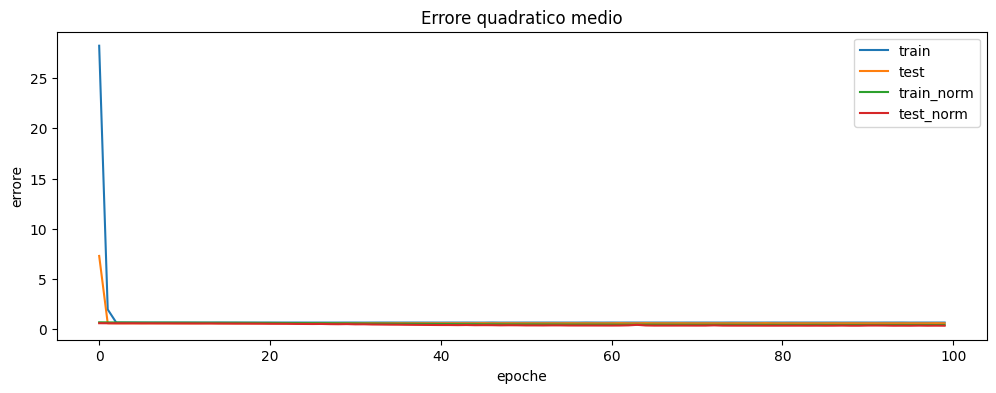

In [20]:
# visualizzazione dell'andamento dell'errore
# durante l'addestramento

plt.figure(figsize=(12, 4))
plt.title('Errore quadratico medio')
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='test')
plt.plot(log_norm.history['loss'], label='train_norm')
plt.plot(log_norm.history['val_loss'], label='test_norm')
plt.xlabel('epoche')
plt.ylabel('errore')
plt.legend()
plt.show()

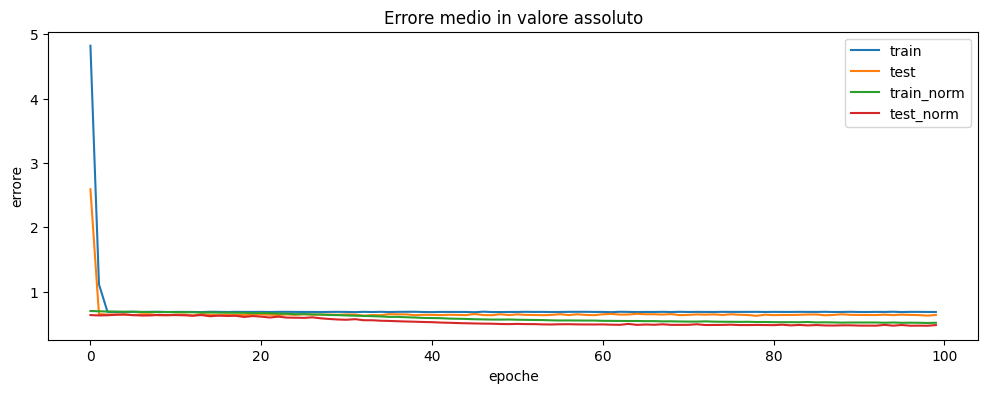

In [21]:
plt.figure(figsize=(12, 4))
plt.title('Errore medio in valore assoluto')
plt.plot(log.history['mean_absolute_error'], label='train')
plt.plot(log.history['val_mean_absolute_error'], label='test')
plt.plot(log_norm.history['mean_absolute_error'], label='train_norm')
plt.plot(log_norm.history['val_mean_absolute_error'], label='test_norm')
plt.xlabel('epoche')
plt.ylabel('errore')
plt.legend()
plt.show()

In [22]:
# recupero dell'errore quadratico medio e dell'errore
# medio in valore assoluto del modello sul
# dataset di test dei 2 modelli

eval = model.evaluate(x_test,y_test)
eval_norm = model.evaluate(x_test_norm,y_test)
print(eval)
print(eval_norm)

5/5 [==============================] - 0s 997us/step - loss: 0.3471 - mean_absolute_error: 0.4805
[1.7513550519943237, 1.1653369665145874]
[0.34705477952957153, 0.4804656505584717]


In [23]:
# Predizioni sul dataset
# di validazione

preds = model.predict(x_test)
preds_norm = model.predict(x_test_norm)

5/5 [==============================] - 0s 771us/step


In [26]:
# stampa del confronto tra valori reali e predetti
# su 10 esempi a caso del dataset di test

for i in range(10):
    id = np.random.randint(0, preds.shape[0]-1)
    print('predetto:', int(preds[id][0]), '\treale:', y_test.iloc[id])
    #print('\n')
    print('predetto_norm:', int(preds_norm[id][0]), '\treale_norm:', y_test.iloc[id])
    print('\n')

predetto: 6 	reale: 5
predetto_norm: 5 	reale_norm: 5


predetto: 6 	reale: 5
predetto_norm: 5 	reale_norm: 5


predetto: 6 	reale: 6
predetto_norm: 5 	reale_norm: 6


predetto: 6 	reale: 6
predetto_norm: 5 	reale_norm: 6


predetto: 6 	reale: 5
predetto_norm: 5 	reale_norm: 5


predetto: 6 	reale: 7
predetto_norm: 5 	reale_norm: 7


predetto: 6 	reale: 6
predetto_norm: 5 	reale_norm: 6


predetto: 6 	reale: 6
predetto_norm: 5 	reale_norm: 6


predetto: 6 	reale: 6
predetto_norm: 5 	reale_norm: 6


predetto: 6 	reale: 5
predetto_norm: 5 	reale_norm: 5




In [27]:
# stampa del confronto tra valori reali e predetti
# su 10 esempi a caso del dataset di test
# utilizzare il valore dell'errore medio riscontrato
# in validazione del modello come offset rispetto
# al volore predetto per definire l'intervallo
# relativo alla "risposta del modello"

for i in range(10):
    id = np.random.randint(0, preds.shape[0]-1)
    print('predetto:', int(preds[id][0] - eval[1]),'-', int(preds[id][0] + eval[1]), '\treale:', y_test.iloc[id])
    #print('\n')
    print('predetto_norm:', int(preds_norm[id][0] - eval[1]),'-', int(preds_norm[id][0] + eval[1]), '\treale_norm:', y_test.iloc[id])
    print('\n')

predetto: 5 - 7 	reale: 6
predetto_norm: 4 - 7 	reale_norm: 6


predetto: 5 - 7 	reale: 6
predetto_norm: 4 - 7 	reale_norm: 6


predetto: 5 - 7 	reale: 5
predetto_norm: 4 - 6 	reale_norm: 5


predetto: 5 - 7 	reale: 6
predetto_norm: 4 - 6 	reale_norm: 6


predetto: 5 - 7 	reale: 7
predetto_norm: 4 - 7 	reale_norm: 7


predetto: 5 - 7 	reale: 6
predetto_norm: 3 - 6 	reale_norm: 6


predetto: 5 - 7 	reale: 5
predetto_norm: 4 - 6 	reale_norm: 5


predetto: 5 - 7 	reale: 6
predetto_norm: 5 - 7 	reale_norm: 6


predetto: 5 - 7 	reale: 7
predetto_norm: 4 - 6 	reale_norm: 7


predetto: 5 - 7 	reale: 4
predetto_norm: 4 - 6 	reale_norm: 4


